# **Image Classification of the CIFAR10 Dataset**

## Abstract

This notebook explores basic machine learning methods for the task of image classification on the CIFAR-10 dataset.

## Table of Contents

>[Image Classification of the CIFAR10 Dataset](#scrollTo=Nhok9GMVV612)

>>[Abstract](#scrollTo=XZ3hkvJTffZA)

>>[Table of Contents](#scrollTo=uw2CJRttGEU2)

>>[Background](#scrollTo=JwP-7BANgFEz)

>>>[Image Classification Task](#scrollTo=6BNu0UQuWn95)

>>>[CIFAR-10 Dataset](#scrollTo=EuG5hTteZnVr)

>>[Non-Parametric Approach](#scrollTo=N1HbuAps8_IX)

>>>[K-Nearest Neighbours Classifier](#scrollTo=MXeRGpz0hR4O)

>>[Parametric Approach](#scrollTo=rXgCThu19BjX)

>>>[Linear Classifier](#scrollTo=7NXqSjqa9joQ)

>>[Tensorflow Implementation of a Linear Classifier](#scrollTo=UZVbrp5hq7ps)

>>>[Import Libraries](#scrollTo=JY9YNYlGrbbg)

>>>[Download the Dataset](#scrollTo=tfBC7s4Jr7rn)

>>>[Explore the Dataset](#scrollTo=fpQKZc3ytkTT)

>>>[Prepare the Dataset](#scrollTo=Sg81gSQLyEtz)

>>>[Model Creation](#scrollTo=O9v98sxdv3-P)

>>[PyTorch Implementation of a Linear Classifier](#scrollTo=VUpP8kRlorYf)

>>>[Import Libraries](#scrollTo=IkjjZTrKov7V)

>>>[Download the Dataset](#scrollTo=6tRW732qo8bE)

>>>[Model Creation](#scrollTo=9DNel0hjzHx5)

>>>[Model Training](#scrollTo=9U8ngJWN16b-)

>>>[Limitations of a Linear Classsifier](#scrollTo=hAoWmQ-wIz8S)



## Background

### Image Classification Task

Image Classification is a fundamental task in computer vision that attempts to comprehend an entire image as a whole. The goal is to classify the image by assigning it to one (single-label classification) or more (multi-label classification) labels.

### CIFAR-10 Dataset

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is a labeled subset of the [80 million tiny images dataset](http://groups.csail.mit.edu/vision/TinyImages/). They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. The dataset consists of 60k (32x32) coloured RGB images from 10 classes, with 6k images per class. They are divided into 50k training images and 10k test images.

The classes are:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck



## Non-Parametric Approach

### K-Nearest Neighbours Classifier

The KNN classifier is a non-parametric supervised learning method. It is a type of instance-based classifier, meaning that it does not attempt to construct a general internal model, but simply stores the instances of the training data. 

Classification is obtained through a simple majority vote of the nearest $k$ neighbours of the query instance. In other words, a query instance is assigned the data class with the most representatives within the nearest $k$ neighbours of it.

**Training**

KNN is not trained. Training is simply storing all the training instances and their corresponding labels. This means that all the computation is postponed to the inference step, which is a drawback of the classifier. 

**Inference**

For a given query instance:
1. Compute the distance in the feature space between the query instance and all training instances.

2. Retrieve the labels for the closest $k$ neighbours.

3. Cast a majority label vote to classify the query instance.

**Hyperparameters**

These hyperparameters affect the classifier's decision boundary and in turn, its performance. These hyperparameters can be chosen using a validation data subset and grid search.

- $k$ 

  By increasing $k$, we increase the model capacity/complexity of the classifier (e.g. $k=1$ produces a model with the largest capacity which can perfectly classify any training dataset).

  By reducing $k$, we reduce the model capacity so that the decision boundaries between the classes become smoother and more regular for better generalization.

- Distance Function


**KNN Limitations**

While, in theory, the non-parametricism of KNN classifiers makes them universal function approximators, they can only produce reliable results provided they're given enough data. This is a problem because even for $32$x$32$ images, the corresponding vector space would consist of $256^{32x32x3}$ dimensions. This is known as the "Curse of dimensionality" which refers to the exponential growth of the amount of data needed as the vector space dimensionality increases.

- Distance in the vector space of image pixels is not semantically meaningful.

- With high-dimensional large datasets, KNN becomes very slow at inference time.



## Parametric Approach

The idea here is to sacrifice some of the model's capacity in order to achieve a more regular decision boundary that does a better job at generalizing with less data. Another advantage is that the inference time will be reduced significantly.

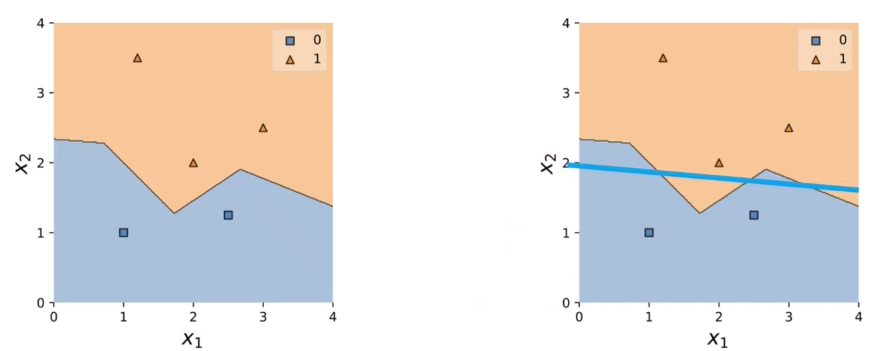

Thus, the classifier function is now parametrized by $\theta$ that becomes the subject of the learning process.

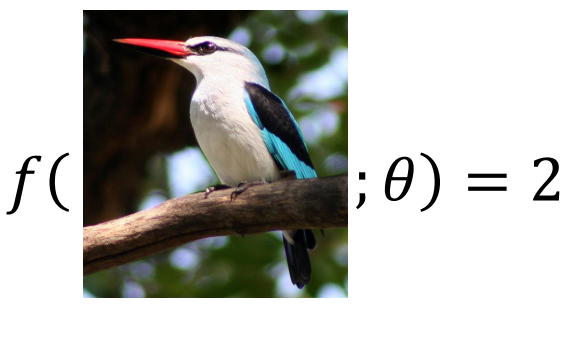

### Linear Classifier

The simplest parametric model is a linear classifier which takes the input image vector $x$ and multiplies it by a weight vector $W$.

In the formula shown below, the learned function is required to output the class integer id $class$. This is a bad idea because there isn't any semantic relationship between the discrete integer class ids.

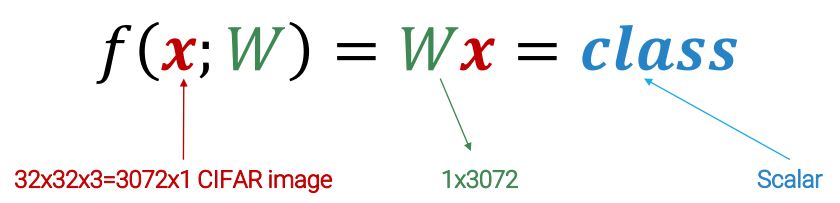

A better learned output would be to consider each class as a separate classification problem. This means that the function should output a score vector (sometimes called $logits$) which captures how likely the input image belongs to each class. Classification can thus be obtained by choosing the class with the highest score.

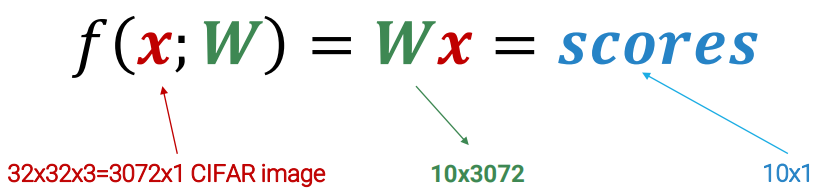

**Intuition Behind Linear Classifiers**

As shown below, the classification process is performed as follows:
1. Flatten the input image into an image vector $x$.
2. Apply the weight matrix transformation $W$ to the image vector $x$.
3. Apply $argmax$ to get the class with maximum score.

By reasoning in the image space instead, this classification process can also be thought of as template matching between the unflattend image and each "unflattened" row of the weight matrix. It's a correlation operation where the kernel has the same size of the image.

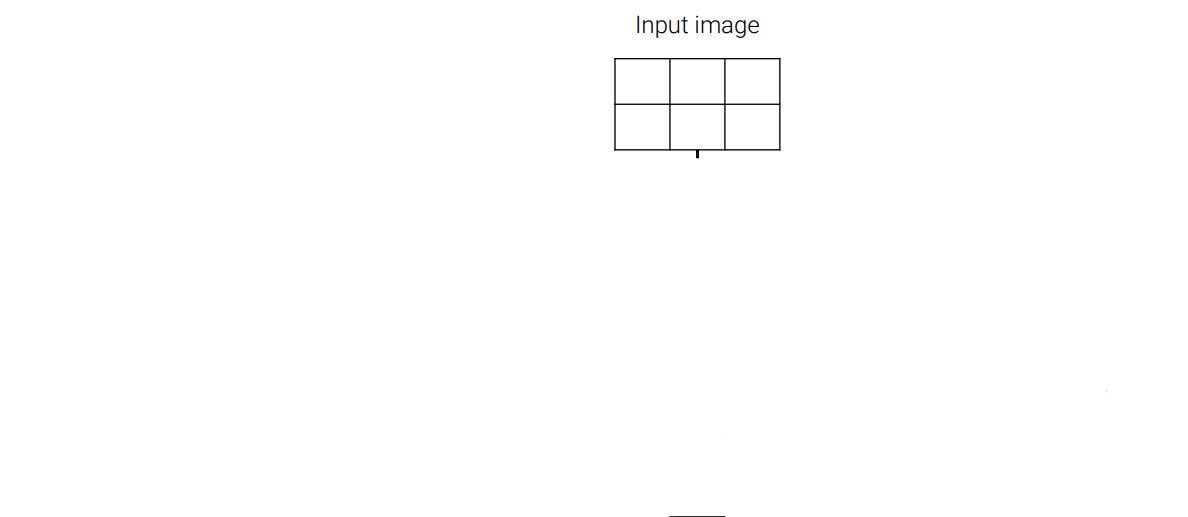

**Affine Classifier**

In machine learning, linear classifiers usually refer to affine classifier which contain a bias vector $b$.

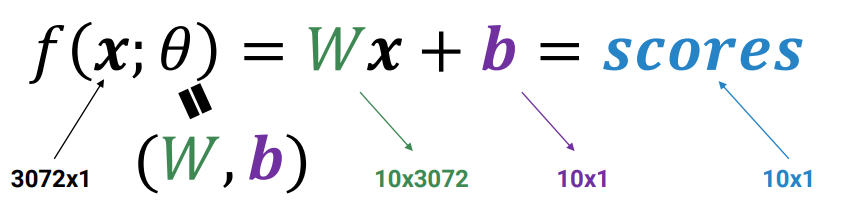

**Training**

In order to train our linear classifier, we need to define the loss function $L$.

The most intuitive loss function that can be used is the $0-1$ loss, which is simply the number of misclassifications made by the system. However, this loss is very difficult to optimize. 

Instead, an easier to optimize loss function (which correlates with the $0-1$ loss) is defined as follows:

$L(\theta)=\frac{1}{N}\sum_{i}L_i(\theta)$

where $L_i$ is the loss of the $i^{th}$ training instance.

**Categorical Cross-Entropy (Softmax) Loss**

A softmax layer takes the scores vector, exponentiates it, and normalizes it so it sums up to $1$. Cross-entropy loss takes the logits output and produces:

$L_i(\theta) = - S_y(i) + max_k(S_k(i))$

where $S_y(i)$ is the softmax value of the true label for the $i^{th} instance$, and $max_k(S_k(i))$ is the maximum value of the softmax vector of the $i^{th}$ instance.

## Tensorflow Implementation of a Linear Classifier

### Import Libraries

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.datasets import cifar10
from keras.layers import Input, Dense, Flatten
from keras import Model

### Download the Dataset

This section uses tensorflow's `Dataset` module to download the [CIFAR10 dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data), consisting of:

- A numpy nd-array `x_train` of 50k training images, each of the shape (32, 32, 3).
- A numpy nd-array `y_train` of 50k of the corresponding training labels.
- A numpy nd-array `x_test` of 10k testing images, each of the shape (32, 32, 3).
- A numpy nd-array `y_test` of 10k of the corresponding testing labels.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"x_train.shape = {x_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"x_test.shape = {x_test.shape}")
print(f"y_test.shape = {y_test.shape}")

170508288/170498071 [==============================] - 14s 0us/step
x_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
x_test.shape = (10000, 32, 32, 3)
y_test.shape = (10000, 1)


### Explore the Dataset

As shown below, each class in equally represented in the training dataset.

In [4]:
classes_dict = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

_ , classes_count = np.unique(y_train, return_counts=True)
for i in range(10):
  print(f"{classes_dict[i]}:\t{classes_count[i]}")

airplane:	5000
automobile:	5000
bird:	5000
cat:	5000
deer:	5000
dog:	5000
frog:	5000
horse:	5000
ship:	5000
truck:	5000


### Prepare the Dataset

In [5]:
# Flatten the images
flatten_layer = Flatten()

x_train = flatten_layer(x_train)
x_test = flatten_layer(x_test)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Model Creation

In [14]:
batch_size = 64

# Input Layer
inputs = Input(shape=(32 * 32 * 3, ))

# Output Layer
outputs = Dense(units=10, activation="softmax")(inputs)

# Model
keras_model = Model(inputs, outputs)

In [15]:
keras_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_2 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [16]:
keras_model.compile("adam", loss="categorical_crossentropy", metrics="accuracy")
keras_model.fit(x_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 4s 3ms/step - loss: 100.5522 - accuracy: 0.2356 - val_loss: 104.2584 - val_accuracy: 0.2424
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 89.7588 - accuracy: 0.2575 - val_loss: 123.1584 - val_accuracy: 0.2136
Epoch 3/20
1407/1407 [==============================] - 5s 3ms/step - loss: 85.9817 - accuracy: 0.2684 - val_loss: 59.4238 - val_accuracy: 0.2712
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 84.3687 - accuracy: 0.2746 - val_loss: 114.0665 - val_accuracy: 0.2360
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 82.3128 - accuracy: 0.2724 - val_loss: 130.5288 - val_accuracy: 0.1832
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 84.3299 - accuracy: 0.2774 - val_loss: 139.1369 - val_accuracy: 0.2278
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 88.2179 - accuracy: 0.2742 - val_loss: 128

## PyTorch Implementation of a Linear Classifier

### Import Libraries

In [ ]:
import torch
import torchvision
from torch.utils.data import random_split
from torch.nn.functional import cross_entropy 
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

### Download the Dataset

This section uses PyTorch's `torchvision.datasets` utility class to download the CIFAR-10 dataset. It returns a `torch.utils.data.Dataset` object, containing the instances and their corresponding labels.

The `transforms.ToTensor()` instructs PyTorch to load the images as PyTorch tensors (in doing so, the pixels' range changes from $[0-255]$ to $[0-1]$).

In [ ]:
# Download the training and testing datasets
train_ds = torchvision.datasets.CIFAR10(root="/data/", train=True, transform=transforms.ToTensor(), download=True)
test_ds = torchvision.datasets.CIFAR10(root="/data/", train=False, transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /data/cifar-10-python.tar.gz to /data/


In [ ]:
train_ds

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_ds

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /data/
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
classes = train_ds.classes
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Example Training Instance:-
Image Tensor Shape: torch.Size([3, 32, 32])
Image Label: 6
Image Label Class: frog


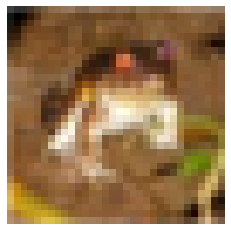

In [ ]:
def show(img):

  # Convert the image tensor to a numpy array
  img = img.numpy()

  # Change image shape from (3, 32, 32) to (32, 32, 3)
  img = np.transpose(img, (1, 2, 0))

  # Plot the image and turn off the axes
  plt.imshow(img)
  plt.axis("off")

example_training_instance = train_ds[0]
example_training_image = example_training_instance[0]
example_training_label = example_training_instance[1]

print("Example Training Instance:-")
print(f"Image Tensor Shape: {example_training_image.shape}")
print(f"Image Label: {example_training_label}")
print(f"Image Label Class: {classes[example_training_label]}")

show(example_training_image)

In [ ]:
def dataset_to_feature_matix_and_labels(ds):
  if isinstance(ds, torch.utils.data.dataset.Subset):
    ds_features = ds.dataset.data[ds.indices,].reshape((len(ds), -1))
    ds_labels = np.array(ds.dataset.targets)[ds.indices]

  else:
    ds_features = ds.data.reshape((len(ds), -1))
    ds_labels = np.array(ds.targets)

  features_tensor = torch.from_numpy(ds_features) / 255
  labels_tensor = torch.from_numpy(ds_labels)
  return features_tensor, labels_tensor

In [ ]:
x_train, y_train = dataset_to_feature_matix_and_labels(train_ds)
x_test, y_test = dataset_to_feature_matix_and_labels(test_ds)

### Model Creation

The linear classifier is defined as:

$\hat y = x^TW+b$

$(num\_samples \times 10) = (num\_samples \times num\_features) (num\_features \times 10) + (num\_samples \times 10)$

In [ ]:
def linear_classifier(x, W, b):
  return torch.matmul(x, W) + b 

Weights Initialization:

- The weights are randomly initialized following a Gaussian distribution with mean $\mu = 0$ and standard deviation $\sigma = 0.001$.

- The biases are initialized as a vector of zeros.

In [ ]:
def initialize_weights(num_features, num_classes, sigma=0.001):
  W = torch.normal(0, sigma, (num_features, num_classes))
  b = torch.zeros(num_classes)
  return W.requires_grad_(), b.requires_grad_()

In [ ]:
def accuracy(y_pred, y_true):
  """
    Arguments:
      - y_pred: (shape=(num_instances, 10)) 
                scores (logits) of the linear classifier.
      - y_true: (list) 
                of true label indices.

    Returns:
      - Accuracy of the model.
  """
  y_hat = torch.argmax(y_pred, 1)
  num_correct_predictions = (y_hat==y_true).sum()
  return num_correct_predictions.true_divide(y_true.shape[0])

### Model Training

In [ ]:
# Parameters
num_features = x_train.shape[1]
num_classes = len(classes)

# Hyperparameters
epochs = 800
learning_rate = 1e-2

def train_classifier(x_train, y_train, x_test, y_test):
  # Training Loop
  W, b = initialize_weights(num_features, num_classes)
  for e in range(epochs):

    # Forward pass
    scores = linear_classifier(x_train, W, b)
    loss = cross_entropy(scores, y_train)
    
    # Backward pass
    loss.backward()
    
    # Compute training metrics
    acc = accuracy(scores, y_train).item()
    

    with torch.no_grad():
      # Update weights
      W -= learning_rate * W.grad
      b -= learning_rate * b.grad

      # Zero the gradients
      W.grad.zero_()
      b.grad.zero_()

      # Compute validation loss and metrics
      valid_scores = linear_classifier(x_test, W, b)
      valid_loss = cross_entropy(valid_scores, y_test).item()
      valid_acc = accuracy(valid_scores, y_test).item()
    
    if e % 50 == 0:
      print(f"Epoch {e}: train loss {loss:.3f} - train acc {acc:.3f} - valid loss {valid_loss:.3f} - valid acc {valid_acc:.3f}")

  return W, b

In [ ]:
W, b = train_classifier(x_train, y_train, x_test, y_test)

Epoch 0: train loss 2.303 - train acc 0.102 - valid loss 2.291 - valid acc 0.100
Epoch 50: train loss 2.086 - train acc 0.295 - valid loss 2.085 - valid acc 0.296
Epoch 100: train loss 2.008 - train acc 0.322 - valid loss 2.009 - valid acc 0.321
Epoch 150: train loss 1.964 - train acc 0.336 - valid loss 1.965 - valid acc 0.334
Epoch 200: train loss 1.935 - train acc 0.346 - valid loss 1.936 - valid acc 0.342
Epoch 250: train loss 1.913 - train acc 0.351 - valid loss 1.915 - valid acc 0.349
Epoch 300: train loss 1.896 - train acc 0.356 - valid loss 1.899 - valid acc 0.352
Epoch 350: train loss 1.882 - train acc 0.361 - valid loss 1.885 - valid acc 0.356
Epoch 400: train loss 1.871 - train acc 0.364 - valid loss 1.874 - valid acc 0.361
Epoch 450: train loss 1.862 - train acc 0.367 - valid loss 1.865 - valid acc 0.363
Epoch 500: train loss 1.853 - train acc 0.370 - valid loss 1.857 - valid acc 0.365
Epoch 550: train loss 1.846 - train acc 0.372 - valid loss 1.850 - valid acc 0.367
Epoch 6

## Limitations of a Linear Classsifier

As mentioned above, a linear classification can be viewed as a template matching operation. In the following section, the learned templates are examined to get a better understanding of what drives the classification.

In [ ]:
weights_images = W.T.detach().clone()
weights_images -= weights_images.min(0, keepdim=True)[0]
weights_images /= weights_images.max(0, keepdim=True)[0]
weights_images = weights_images.reshape(10, 32, 32, 3)

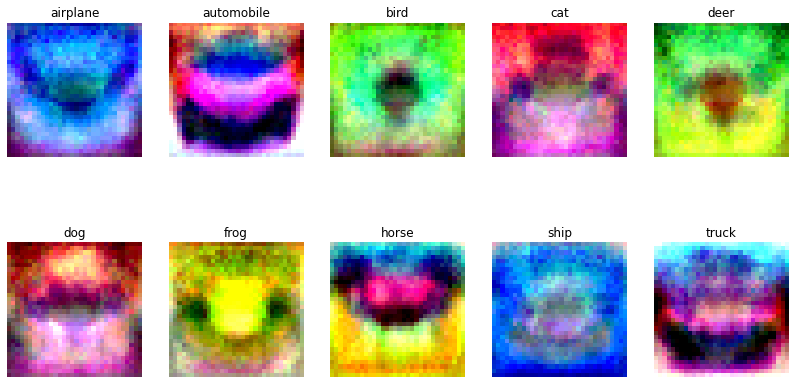

In [ ]:
def show_templates(weights_images):

  for i in range(10):
    plt.subplot(2, 5, i + 1)

    img = weights_images[i, :, :, :]
    
    img = img.numpy()
    plt.imshow(np.transpose(img, (0, 1, 2)))
    plt.axis("off")

    plt.title(classes[i])

  plt.subplots_adjust(hspace = 0.02) 

plt.figure(figsize=(14, 8))
show_templates(weights_images)

From the templates shown above, it's clear that the background is a dominant feature when making predictions. This means that the classifier has no understanding of the objects being detected. It is essentially learning a template representitive of each class from the training dataset. Therefore, the classifier is unable to detect "horses" if the image has a different background from those in the training dataset. Additionally, it's unable to correctly classify images of "horses" that have a different pose from those in the training dataset.